# Modelo Validación Cruzada

Exactitud promedio con validación cruzada de 5 folds: 0.7870
Desviación estándar: 0.0109

Informe de clasificación:
              precision    recall  f1-score   support

        Cara       0.86      0.83      0.85       138
   Económica       0.76      0.88      0.81       155
  Intermedia       0.68      0.59      0.63       145

    accuracy                           0.77       438
   macro avg       0.77      0.77      0.76       438
weighted avg       0.76      0.77      0.76       438



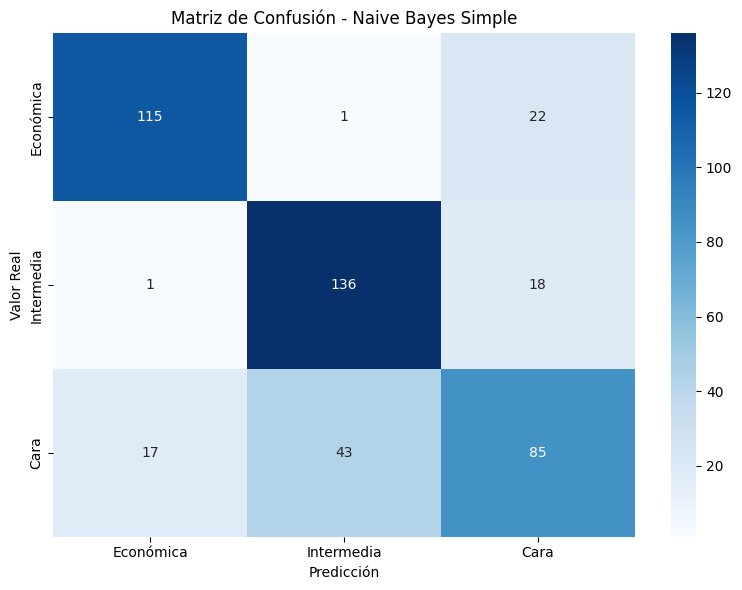

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos
train_data = pd.read_csv('../../train.csv')

# 2. Crear la variable objetivo para categorías de precio
# Dividimos en terciles para tener 3 categorías de precio
price_limits = train_data['SalePrice'].quantile([0.33, 0.67]).values
train_data['PriceCategory'] = pd.cut(
    train_data['SalePrice'], 
    bins=[0, price_limits[0], price_limits[1], float('inf')], 
    labels=['Económica', 'Intermedia', 'Cara']
)

# 3. Seleccionar solo algunas variables numéricas clave para mantenerlo simple
# Basado en los análisis previos, estas son las variables más importantes
selected_features = ['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageCars']

# 4. Preparar los datos
X = train_data[selected_features]
y = train_data['PriceCategory']

# 5. Manejar valores faltantes con la mediana
for feature in selected_features:
    if X[feature].isnull().any():
        X[feature].fillna(X[feature].median(), inplace=True)

# 6. Normalizar las características (importante para Naive Bayes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 8. Crear y entrenar el modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 9. Realizar validación cruzada (5-fold)
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=5)
print(f"Exactitud promedio con validación cruzada de 5 folds: {np.mean(cv_scores):.4f}")
print(f"Desviación estándar: {np.std(cv_scores):.4f}")

# 10. Evaluar en el conjunto de prueba
y_pred = nb_model.predict(X_test)
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# 11. Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Económica', 'Intermedia', 'Cara'],
            yticklabels=['Económica', 'Intermedia', 'Cara'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Naive Bayes Simple')
plt.tight_layout()
